# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)


In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.decomposition import PCA



In [4]:
#Read the data csv file
data_df=pd.read_csv("C:/Users/ksamant/Desktop/vehicle.csv")

Exploratory Data Analysis

In [5]:
#shape of the data
data_df.shape

(846, 19)

In [6]:
# to find the data details
data_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [7]:
# to find if there are any null values in the data
data_df.isnull().values.any()

True

In [8]:
#to find the information about the data types and count of enteries
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [9]:
# to find the null  values count for each attribute
data_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
#to display the five point summary of the data
data_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [11]:
# to replace the null values by calculating the mean for each column and asssigning it to new data frame
data_dfmean = data_df.fillna(data_df.mean())
data_dfmean.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.133943             15.740902     33.400979   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    168.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.678910                 8.567376     168.901775   
std                7.882119                 4.601217      33.195188   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.811559                2.588326                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.631079         439.494076                 174.709716   
std          31.355195         176.457706                  32.546223   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         364.000000                 174.000000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.468450        4.903148          8.930792   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      72.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.919527     195.632388  
std            6.152166       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [12]:
# to replace the null values by calculating the median for each column and asssigning it to new data frame
data_dfmedian = data_df.fillna(data_df.median())
data_dfmedian.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [13]:
data_dfmedian.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
data_dfmedian.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [15]:
# to replace the null values by calculating the mode for each column and asssigning it to new data frame
data_dfmode = data_df.fillna(data_df.mode())
data_dfmode.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [16]:
# I am not sure why the Null values have not been replaced by the mode code executed above like the median Please help me with that

data_dfmode.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

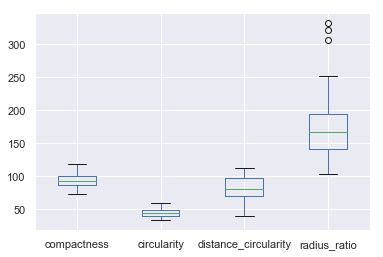

In [17]:
data_df.boxplot(['compactness','circularity','distance_circularity','radius_ratio'])

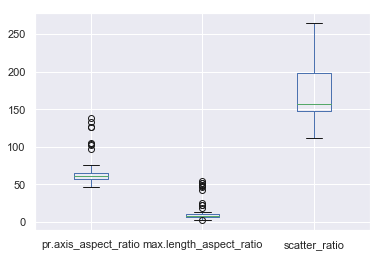

In [18]:
data_df.boxplot(['pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio'])

As per the above the boxplot plotted for the different attributes in the dataset . It seems that replacing the dataset null
values by calculating the mean of each attributes is not feasible even though the std deviation for the mean dataframe-data_dfmean
does not differ significantly . Similarly the std deviation and mean for the two other dataframe -  data_dfmedian and 
data_dfmode does not differ significantly and we consider building model with the data_dfmedian.

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

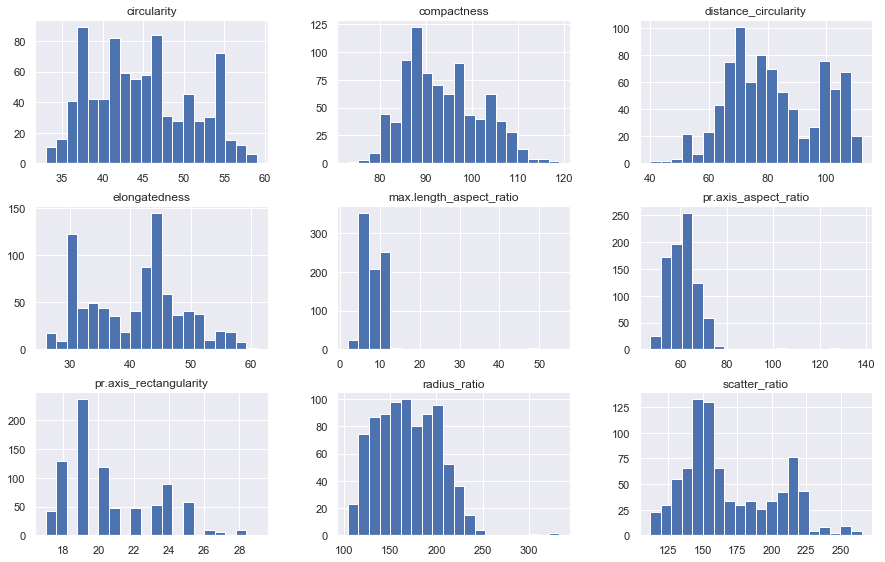

In [19]:
# finding the distribution of the numerical continous data present in the dataframe through histogram
# Histogram of first 9 columns
columns = list(data_df)[0:9]
data_dfmedian[columns].hist(stacked=False, bins=20, figsize=(15,30), layout=(9,3));

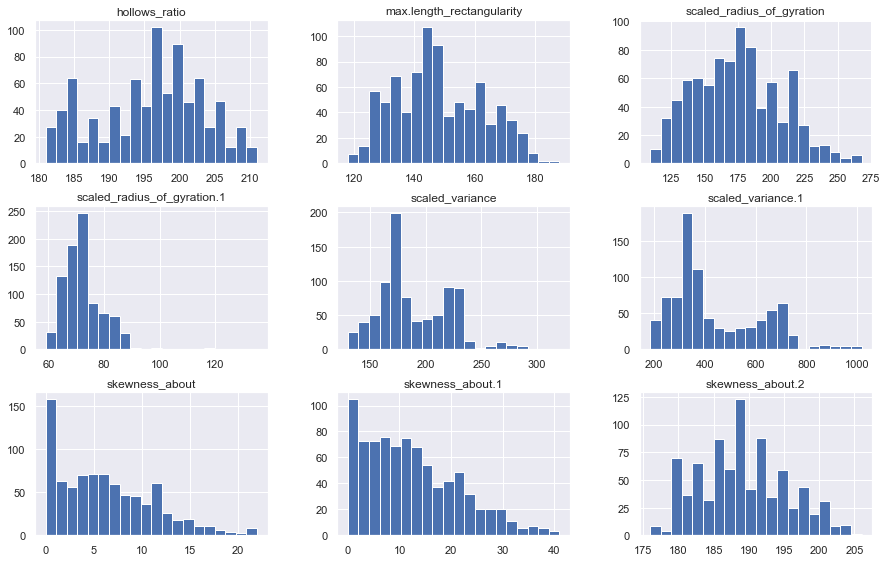

In [21]:
# Histogram of first 8 columns
columns = list(data_df)[9:20]
data_dfmedian[columns].hist(stacked=False, bins=20, figsize=(15,30), layout=(9,3));

In [22]:
# to find the co-relation of the attributes of the dataset
data_dfmedian.corr()


compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

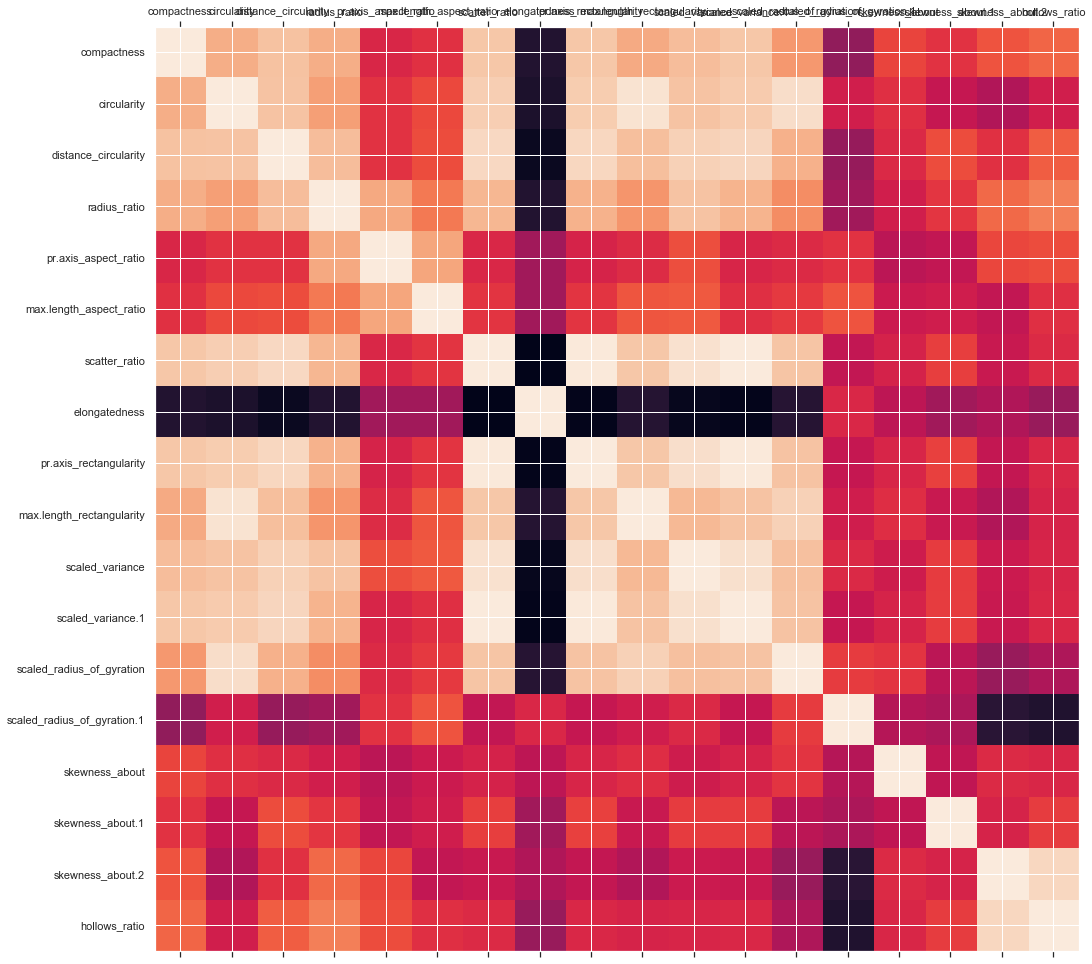

In [23]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=17):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(data_dfmedian)

As per the above correlation matrix it is clear that the light brown colored square has the maximum correlation
and the voilet colored squares has the lowest correlation . From the above graph it can be concluded some of the variable
are strongly correlated to each other.

    


# As per the Pairplot, Histogram and Co-orelation graph the columns Scaled_radius_of_gyration.1 , skewness_about, skewness_about.1 and skewness_about2 does not have any strong positive/negative relation with other attributes. We can go ahead and use the remaining attributes. 

# However at in this assignment i am not dropping all the above mentioned columns since i am not sure dropping columns on the basis of this graph is feasible or not. So please let me know two things :
1) what all other things are considered while dropping columns 
2) Is it feasible to drop columns like this as i think PCA/regularization methods are useful. Please let me know through your
feedback

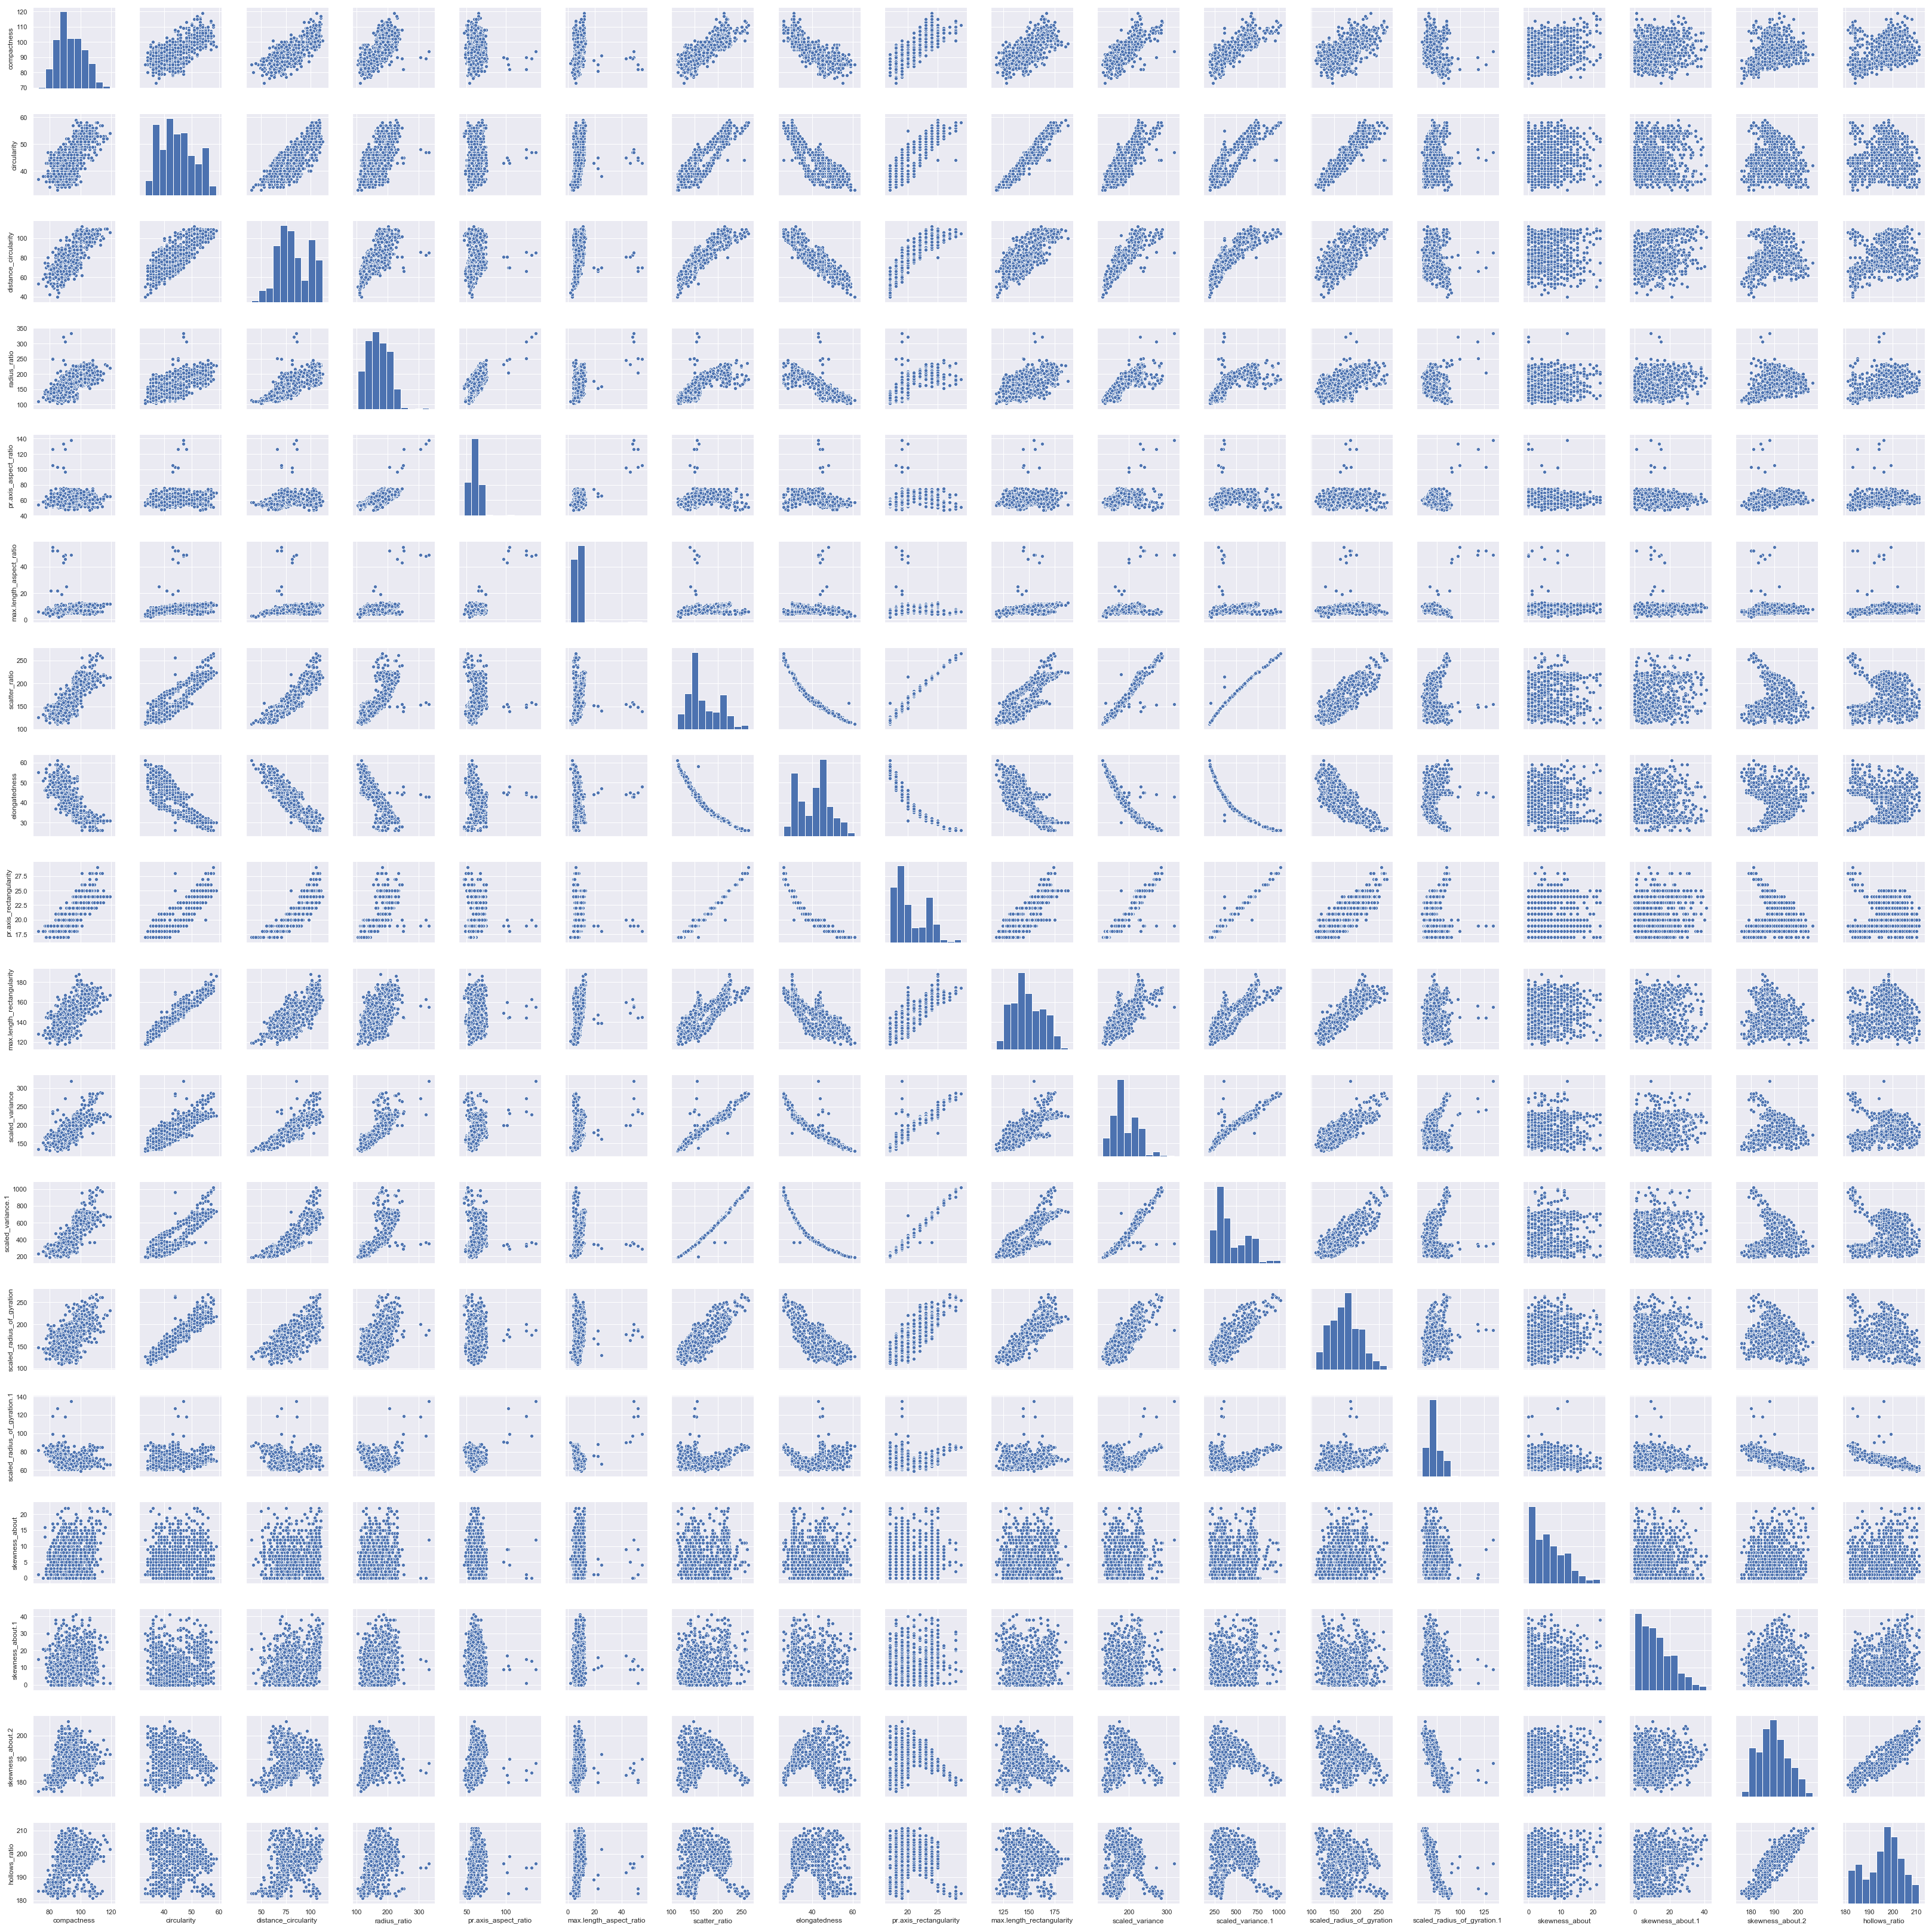

In [24]:
sns.pairplot(data_dfmedian)

# 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

In [25]:
#new_data = data_dfmedian.rename(columns = {"class": "class1"}) 

In [26]:
#data_dfmedian.head()

In [27]:
#new_data.head()

In [28]:
#x,y = np.array(new_data)[ :, 0:19], np.array(new_data.class1)[:]

In [29]:

#splitting the data of data_dfmedian
# independant variables
#x = new_data.drop(['class1'], axis=1)
# the dependent variable
#y = new_data[['class1']]

In [30]:

array = data_dfmedian.values
X = array[:,0:18]
Y = array[:,18]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)



# 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)

In [31]:
clf = svm.SVC(gamma=0.025, C=3)

In [32]:
clf.fit(X_train , Y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0



In [34]:
y_pred = clf.predict(X_test)

In [35]:
getAccuracy(Y_test , y_pred)
# Calling getAccuracy function instead of usinig array comparison to get the %age accuracy

53.54330708661418

In [36]:
y_grid = (np.column_stack([Y_test, y_pred]))

In [37]:
print(y_grid)

[['van' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'car']
 ['van' 'car']
 ['van' 'car']
 ['van' 'car']
 ['van' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['van' 'car']
 ['car' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['van' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['van' 'car']
 ['van' 'car']
 ['car' 'car']
 ['van' 'car']
 ['van' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['van' 'car']
 ['car' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['car' 'c

In [38]:
np.savetxt("ocr.csv", y_grid , fmt='%s')

In [39]:

import string
lab= list(("bus","car","van"))
plab=["Pr "+s for s in lab]


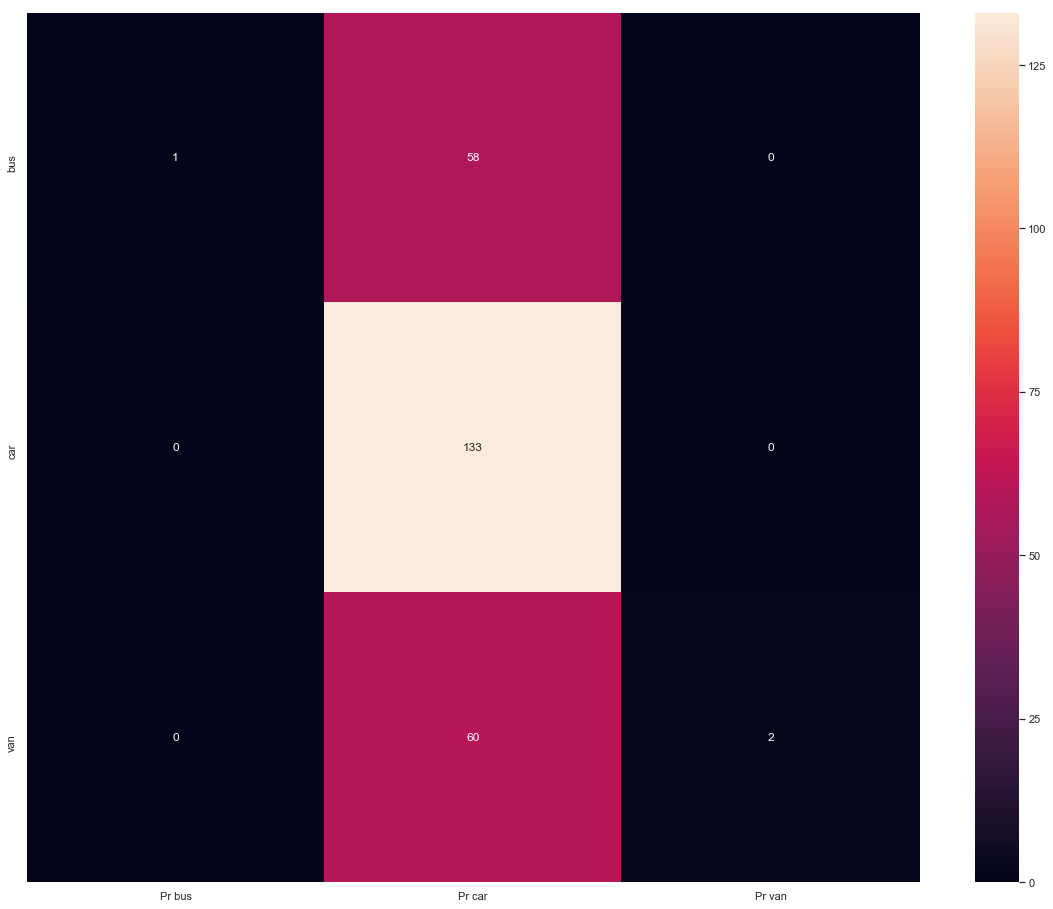

In [40]:


from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(Y_test, y_pred, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g')

# 4 .Perform K-fold cross validation and get the cross validation score of the model (10 marks)


In [41]:

array = data_dfmedian.values
X = array[:,0:18]
Y = array[:,18]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\ksamant\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ksamant\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0.94117647 0.82352941 0.94117647 1.         0.88235294 1.
 0.94117647 0.94117647 0.94117647 0.94117647 0.94117647 1.
 0.88235294 0.94117647 1.         1.         0.88235294 0.94117647
 1.         1.         0.82352941 1.         1.         1.
 1.         0.88235294 0.94117647 0.88235294 0.94117647 1.
 1.         0.94117647 0.94117647 1.         0.88235294 1.
 0.94117647 1.         0.88235294 1.         0.82352941 1.
 1.         0.94117647 0.94117647 1.         0.9375     1.
 1.         0.9375    ]
Accuracy: 95.162% (5.224%)


# 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

In [42]:
# independant variables
X = data_dfmedian.drop(['class'], axis=1)
# the dependent variable
y = data_dfmedian[['class']]

In [43]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [44]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [45]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
#The eigen values
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [47]:
#the Eigen vectors
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [48]:
#And the percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


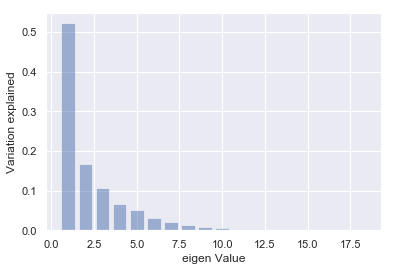

In [49]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

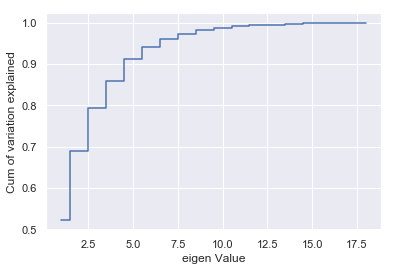

In [50]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Dimensionality Reduction
:Now 7 dimensions seems very reasonable. With 7 variables we can explain over 95% of the variation in the original data!

In [51]:
pca3 = PCA(n_components=7)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [52]:
Xpca3

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
         7.93007079e-02, -7.57446693e-01, -9.01124283e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
         6.93948582e-01, -5.17161832e-01,  3.78636988e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.31732265e-01,  7.05041037e-01, -3.45837595e-02],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -1.34423635e+00, -2.17069763e-01,  5.73248962e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
         4.27680052e-02, -4.02491279e-01, -2.02405787e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -5.40510367e-02, -3.35637136e-01,  5.80978683e-02]])

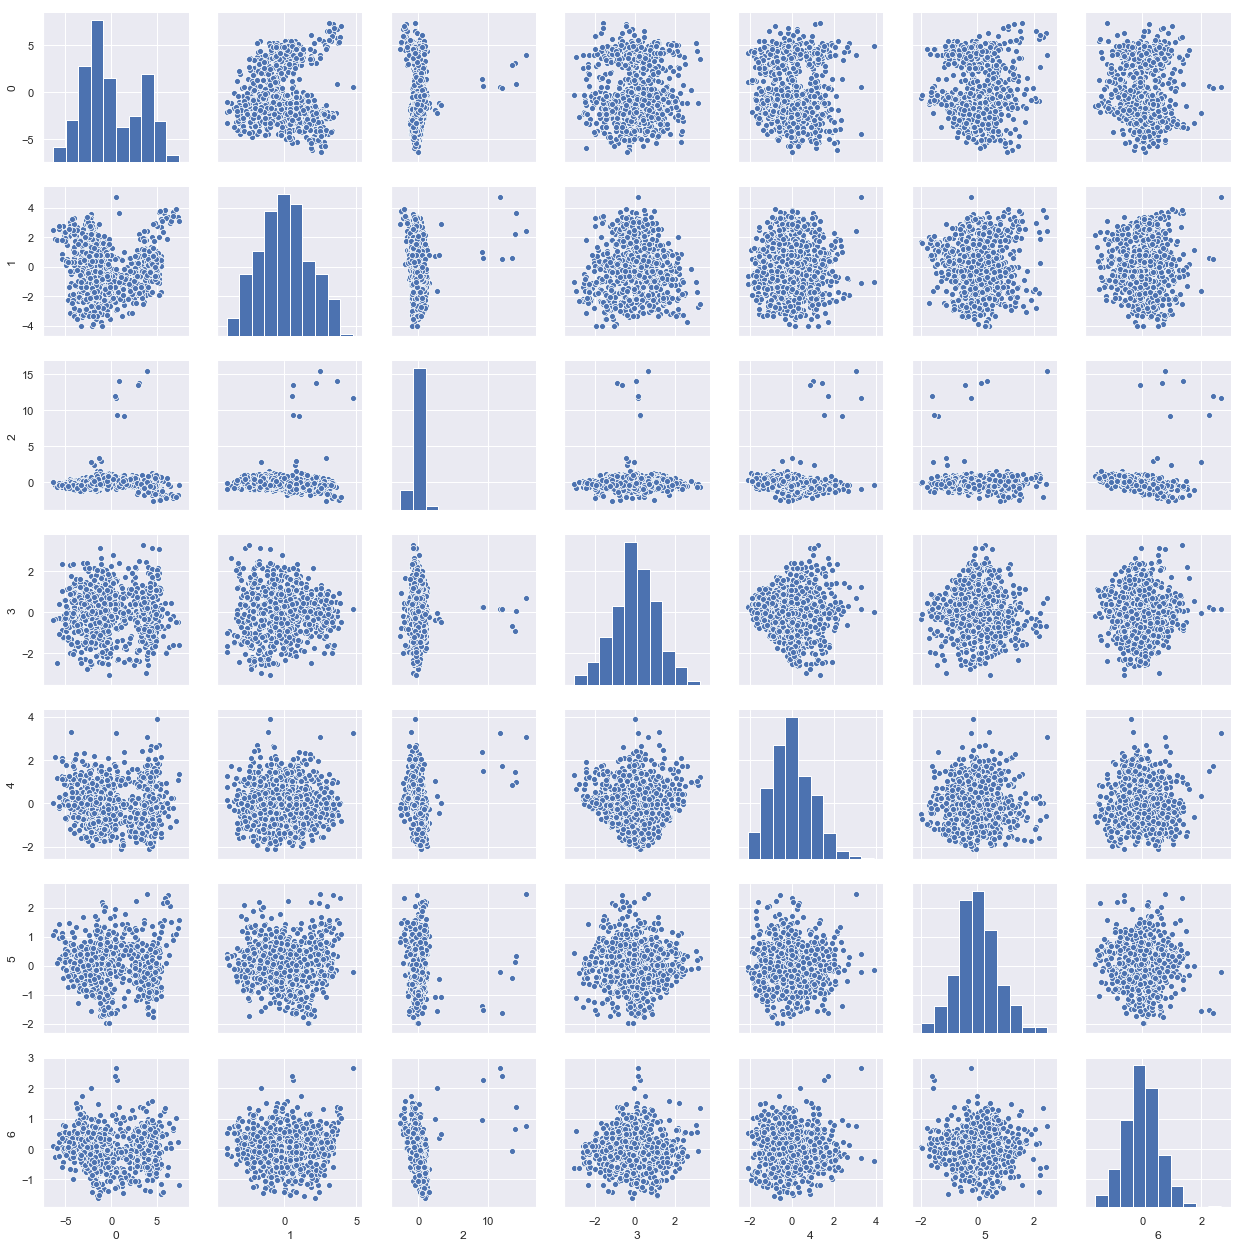

In [53]:
sns.pairplot(pd.DataFrame(Xpca3))

In [54]:
Pca_data=pd.DataFrame(Xpca3)

In [55]:
Pca_data.head()

0         1          2         3         4         5         6
0  0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447 -0.901124
1 -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162  0.378637
2  3.769324  0.195283   0.087859  1.202212  0.731732  0.705041 -0.034584
3 -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431  0.470753
4  0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446  2.671578

In [56]:
Pca_data.count()

0    846
1    846
2    846
3    846
4    846
5    846
6    846
dtype: int64

Implementing the SVM model

In [57]:
array1 = Pca_data.values
array = data_dfmedian.values
X = array1[:,0:7]
Y = array[:,18]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)




In [58]:
clf = svm.SVC(gamma=0.025, C=3)

In [59]:
clf.fit(X_train , Y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
y_pred = clf.predict(X_test)

In [61]:
getAccuracy(Y_test , y_pred)

92.51968503937007

In [62]:
y_grid = (np.column_stack([Y_test, y_pred]))

In [63]:
print(y_grid)

[['van' 'van']
 ['bus' 'bus']
 ['bus' 'bus']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['van' 'van']
 ['van' 'van']
 ['van' 'van']
 ['van' 'van']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['van' 'van']
 ['car' 'bus']
 ['car' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['van' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['bus' 'bus']
 ['car' 'car']
 ['van' 'van']
 ['van' 'van']
 ['car' 'car']
 ['van' 'car']
 ['van' 'van']
 ['car' 'van']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'bus']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['van' 'van']
 ['car' 'car']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'c

In [64]:
np.savetxt("ocr.csv", y_grid , fmt='%s')

In [65]:

import string
lab= list(("bus","car","van"))
plab=["Pr "+s for s in lab]


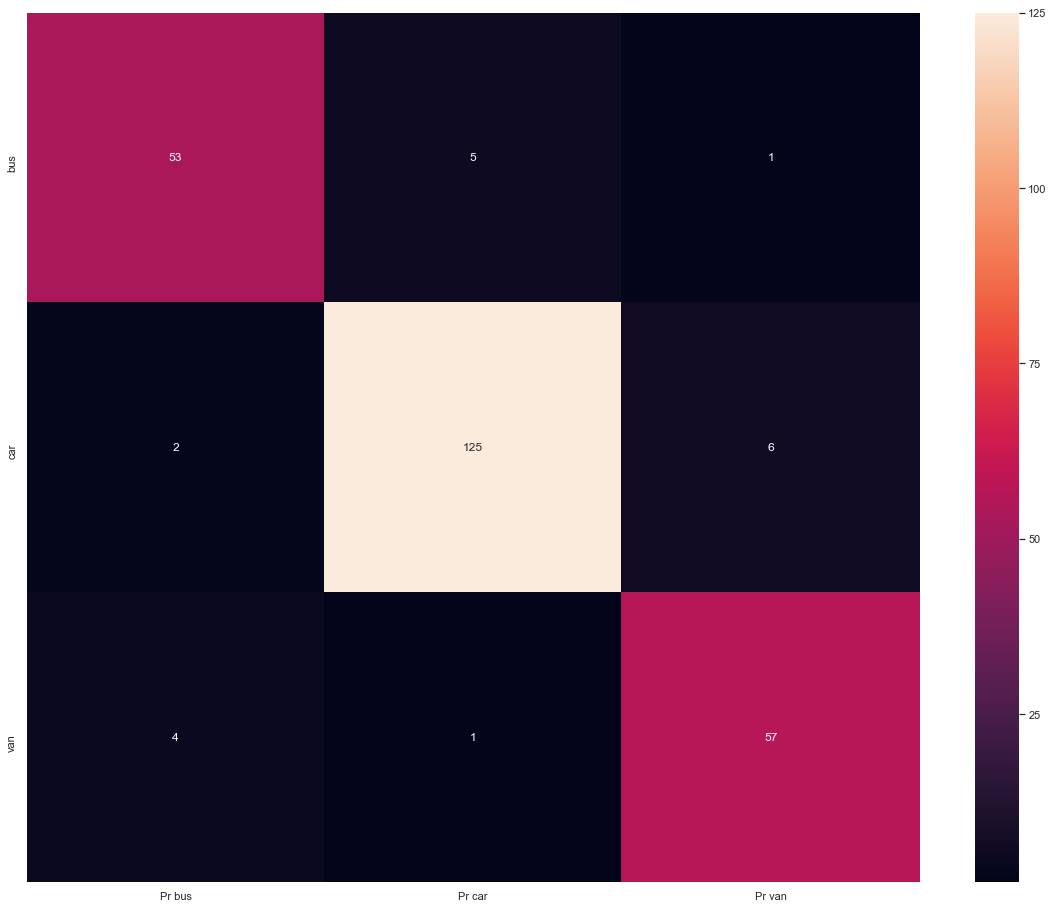

In [66]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(Y_test, y_pred, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g')

Implementing the cross validation score for PCA

In [67]:
array1 = Pca_data.values
array = data_dfmedian.values
X = array1[:,0:7]
Y = array[:,18]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.70588235 0.70588235 0.82352941 0.70588235 0.76470588 0.82352941
 0.82352941 0.76470588 0.88235294 0.88235294 0.58823529 0.94117647
 0.82352941 0.76470588 0.94117647 0.88235294 0.82352941 0.64705882
 0.94117647 0.76470588 0.70588235 0.82352941 0.58823529 0.76470588
 0.76470588 0.88235294 0.82352941 0.94117647 0.88235294 0.82352941
 0.94117647 0.76470588 0.70588235 0.88235294 0.76470588 0.64705882
 0.88235294 0.64705882 0.76470588 0.88235294 0.64705882 1.
 0.82352941 0.52941176 0.76470588 0.70588235 0.8125     0.625
 0.875      0.75      ]
Accuracy: 78.831% (10.517%)


# Compare the accuracy scores and cross validation scores of Support vectormachines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

As per the data provided at the initial stage the dimensions were high in number but the SVM score on that is 53%  and cross
validation score stood at 95% . 
However after performing PCA the dimension was reduced to 7 that covered 95% of data and the SVM score on that front is 92%
cross validation score stood at 78%